# Procesamiento Digital de Señales <img src="./logo_UTN.svg" align="right" width="150"/>
## Alumno: Emanuel Olay
### Tarea Semanal: 6
### Consigna:
1) Implemente las funciones para generar las siguientes ventanas w(k):

Bartlett ó triangular
Hann
Blackman
Flat-top
Ayuda: Puede consultar el capítulo 7.3 del mismo libro para obtener las expresiones analíticas de cada ventana.

a) Para cada ventana grafique w(k) y |W(Ω)|, para N = 1000 muestras, normalizando w(k) de forma tal que la amplitud máxima de |W(Ω)| (lóbulo principal) sea 0 dB.

Ayuda: Posiblemente convenga utilizar zero-padding para visualizar mejor |W(Ω)|.

b) Construya una tabla en la que figuren dos mediciones de la anchura del lóbulo principal de cada ventana:

Ω0 será la frecuencia del primer cruce por cero, es decir |W(Ω)| =0 y 
Ω1, aquella frecuencia tal que |W(Ω1)|=2√2∨−3 dB y 
el valor de transferencia máxima de los lóbulos secundarios (expresado en dB)
W2=max{|W(Ω)|},  ∀ Ω≥Ω0


Sugerencia: Normalice Ω0,1 por Δf=fS√N para facilitar la comparación.

Descripción de las ventanas
 
 
Ω0	Ω1	 W2
Rectangular	 	 	 
Bartlett	 	 	 
Hann	 	 	 
Blackman	 	 	 
Flat-top	 	 	 

In [1]:
"""
Created on Wed Oct  6 14:39:14 2021
TS6 V1

@author: Ema
"""

#######################################################################################################################
#%% Configuración y definiciones
#######################################################################################################################
 
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, fftshift
import matplotlib.patches as mpatches

def mi_Bartlett_window( N=2, figura=1 ):
    ##la funcion interta armar un triangulo
    
    muestras=np.arange(0,N,(N-0)/N)
    
    aux=np.copy(muestras)
    aux.fill(0)
    
    for x in range(N):
        if x<=N/2:
            aux[x]= 2*x/N
        else:
           aux[x]=2- 2*x/N 
    
    plt.figure(figura)
    line_hdls = plt.plot(muestras, aux)
    plt.title('Señal: Bartlett_window')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    
    notita = mpatches.Patch(label='mi bartlett')
    plt.legend(handles=[notita])
    
    plt.show()

def mi_Hann_window( N=2, figura=1 ):
    ##armo el vector de muestras
    muestras=np.arange(0,N,(N-0)/N)
    #armo un vec aux de igual tamanio
    aux=np.copy(muestras)
    #Lo inicializo
    aux.fill(0)
    for x in range(N):
        #
        aux[x]=0.5*(1-np.cos(2 *np.pi* x/N))
        
    plt.figure(figura)
    line_hdls = plt.plot(muestras, aux)
    plt.title('Señal: Hann_window')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    
    notita = mpatches.Patch(label='mi Hann')
    plt.legend(handles=[notita])
    
    plt.show()
    
def mi_Blackman_window( N=2, figura=1 ):
    ##armo el vector de muestras
    muestras=np.arange(0,N,(N-0)/N)
    #armo un vec aux de igual tamanio
    aux=np.copy(muestras)
    #Lo inicializo
    aux.fill(0)
    for x in range(N):
        #
        aux[x]=0.42- 0.5*(np.cos(2 *np.pi* x/N)) + 0.08*(np.cos(4 *np.pi* x/N))
        
    plt.figure(figura)
    line_hdls = plt.plot(muestras, aux)
    plt.title('Señal: Blackman_window')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    
    notita = mpatches.Patch(label='mi Blackman')
    plt.legend(handles=[notita])
    
    plt.show()

def mi_Flat_top_window( N=2, figura=1 ):
    ##armo el vector de muestras
    muestras=np.arange(0,N,(N-0)/N)
    #armo un vec aux de igual tamanio
    aux=np.copy(muestras)
    #Lo inicializo
    aux.fill(0)
    for x in range(N):
        #Me robo los coeficientes de matlab no se que usa numpy
        aux[x]=0.21557895- 0.41663158*(np.cos(2 *np.pi* x/N)) + 0.277263158*(np.cos(4 *np.pi* x/N))- 0.083578947*(np.cos(6 *np.pi* x/N))+0.006947368*(np.cos(8 *np.pi* x/N))
        
    plt.figure(figura)
    line_hdls = plt.plot(muestras, aux)
    plt.title('Señal: Flat_top_window')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    
    notita = mpatches.Patch(label='mi Flat Top')
    plt.legend(handles=[notita])
    
    plt.show()

In [2]:
#######################################################################################################################
#%% Inicio de la simulación
#######################################################################################################################
plt.close('all')

# Datos generales de la simulación
fs = 1000 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras

figura=0
 
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

f=np.arange(0,fs,fs/N)
muestras=np.arange(0,N,(N-0)/N)

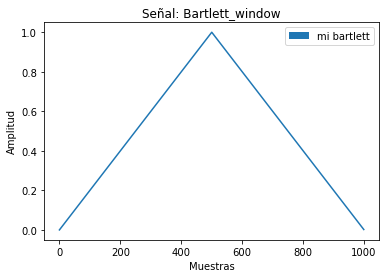

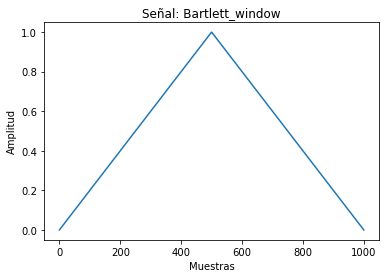

In [3]:
#######################################################################################################################
#%% Barlett
#######################################################################################################################
#Armo la ventana acorde a la cantidad de muestras
Bartlett=np.bartlett(N)
##mi bartlett imprime sola
mi_Bartlett_window( N, figura)

##Imprimo la generada por numpy
plt.figure(figura)
figura=figura+1

plt.plot(muestras,Bartlett)
plt.title('Señal: Bartlett_window')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


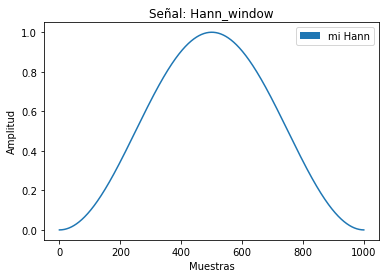

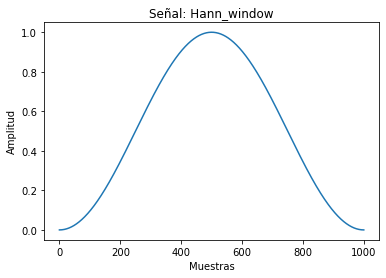

In [4]:
#######################################################################################################################
#%% Hann
#######################################################################################################################
#Armo la ventana acorde a la cantidad de muestras
Hann=np.hanning(N)
##mi Hann imprime sola
mi_Hann_window( N, figura)

##Imprimo la generada por numpy
plt.figure(figura)
figura+=figura

plt.plot(muestras,Hann)
plt.title('Señal: Hann_window')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


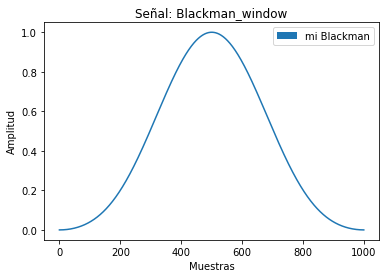

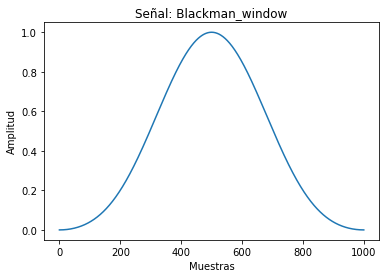

In [5]:
#######################################################################################################################
#%% Blackman
#######################################################################################################################
#Armo la ventana acorde a la cantidad de muestras
Blackman=np.blackman(N)
##mi Blackman imprime sola
mi_Blackman_window( N, figura)

##Imprimo la generada por numpy
plt.figure(figura)
figura+=figura

plt.plot(muestras,Blackman)
plt.title('Señal: Blackman_window')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


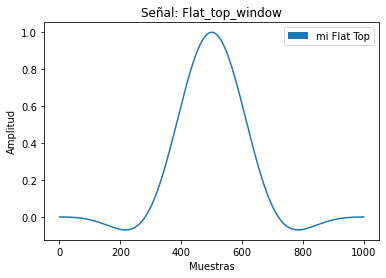

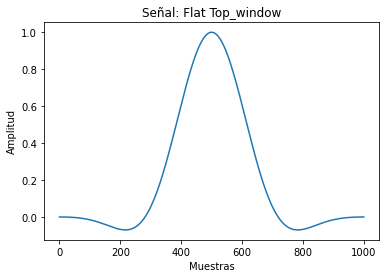

In [6]:
#######################################################################################################################
#%% Flat Top
#######################################################################################################################
#Armo la ventana acorde a la cantidad de muestras
Flattop=sig.windows.flattop(N)
##mi Flat top imprime sola
mi_Flat_top_window( N, figura)

##Imprimo la generada por numpy
plt.figure(figura)
figura+=figura

plt.plot(muestras,Flattop)
plt.title('Señal: Flat Top_window')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


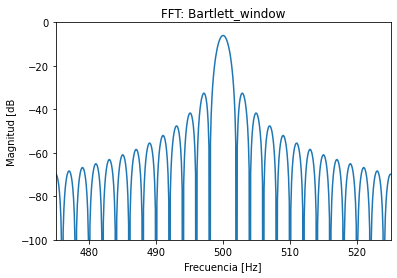

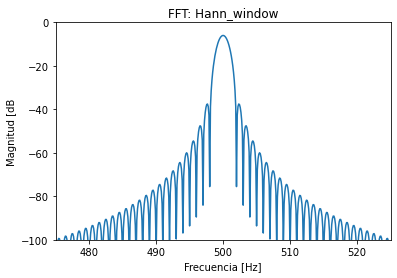

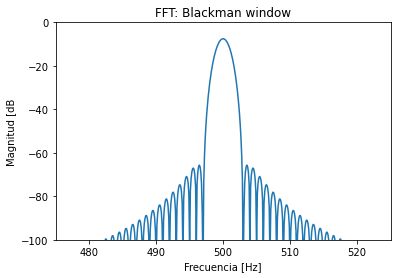

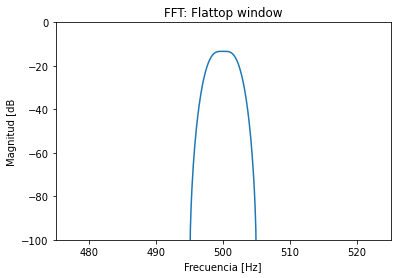

In [7]:
#######################################################################################################################
#%% Hasta aca comprobe que las ventanas son iguales o muy parecidas ahora uso las de scipy y eso
#######################################################################################################################
#Bartlett
NEW_N=9*N
f=np.arange(0,fs,fs/(NEW_N))
Bartlett_fft=fft(Bartlett,NEW_N)
Bartlett_mag=np.abs(fftshift(Bartlett_fft))/N

##Imprimo las ventanas en omega
plt.figure(figura)
figura+=figura
with np.errstate(divide='ignore', invalid='ignore'):
    Bartlett_response=20*np.log10(Bartlett_mag)
    
plt.plot(f,Bartlett_response)
plt.title('FFT: Bartlett_window')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(475,525)
plt.ylabel('Magnitud [dB')
plt.ylim(-100,0)
plt.show()

#Hann
Hann_fft=fft(Hann,NEW_N)
Hann_mag=np.abs(fftshift(Hann_fft))/N

##Imprimo las ventanas en omega
plt.figure(figura)
figura+=figura
with np.errstate(divide='ignore', invalid='ignore'):
    Hann_response=20*np.log10(Hann_mag)
    
plt.plot(f,Hann_response)
plt.title('FFT: Hann_window')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(475,525)
plt.ylabel('Magnitud [dB')
plt.ylim(-100,0)
plt.show()

#Blackman
Blackman_fft=fft(Blackman,NEW_N)
Blackman_mag=np.abs(fftshift(Blackman_fft))/N

##Imprimo las ventanas en omega
plt.figure(figura)
figura+=figura
with np.errstate(divide='ignore', invalid='ignore'):
    Blackman_response=20*np.log10(Blackman_mag)
    
plt.plot(f,Blackman_response)
plt.title('FFT: Blackman window')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(475,525)
plt.ylabel('Magnitud [dB')
plt.ylim(-100,0)
plt.show()

# Flat Top
Flattop_fft=fft(Flattop,NEW_N)
Flattop_mag=np.abs(fftshift(Flattop_fft))/N

##Imprimo las ventanas en omega
plt.figure(figura)
figura+=figura
with np.errstate(divide='ignore', invalid='ignore'):
    Flattop_response=20*np.log10(Flattop_mag)
    
plt.plot(f,Flattop_response)
plt.title('FFT: Flattop window')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(475,525)
plt.ylabel('Magnitud [dB')
plt.ylim(-100,0)
plt.show()